In [1]:
import spot
import spot.ltsmin
# The following line causes the notebook to exit with 77 if spins is not 
# installed, therefore skipping this test in the test suite.
spot.ltsmin.require('spins')
spot.setup()

There are two ways to load a Promela model: from a file or from a cell.   

Loading from a cell
-------------------

Using the `%%pml` magic will save the model in a temporary file, call `spins` to compile it, load the resulting shared library, and store the result into an object whose name is passed as an argument to `%%pml`.

In [2]:
%%pml model
active proctype P() {
int a = 0;
int b = 0;
x: if
  :: d_step {a < 3 && b < 3; a = a + 1; } goto x;
  :: d_step {a < 3 && b < 3; b = b + 1; } goto x;
fi;
}

SpinS Promela Compiler - version 1.1 (3-Feb-2015)
(C) University of Twente, Formal Methods and Tools group

Parsing tmps8i1kbv6.pml...
Parsing tmps8i1kbv6.pml done (0.0 sec)

Optimizing graphs...
   StateMerging changed 0 states/transitions.
   RemoveUselessActions changed 2 states/transitions.
   RemoveUselessGotos changed 2 states/transitions.
   RenumberAll changed 1 states/transitions.
Optimization done (0.0 sec)

Generating next-state function ...
   Instantiating processes
   Statically binding references
   Creating transitions
Generating next-state function done (0.0 sec)

Creating state vector
Creating state labels
Generating transitions/state dependency matrices (2 / 3 slots) ... 

   [..........                                        ]
   [....................                              ]
   [..............................                    ]
   [........................................          ]
   [..................................................]
   Found          5

Yes, the `spins` compiler is quite verbose.  Printing the resulting `model` object will show information about the variables in that model. 

In [3]:
model

ltsmin model with the following variables:
  P_0._pc: pc
  P_0.a: int
  P_0.b: int

To instantiate a Kripke structure, one should provide a list of atomic proposition to observe.

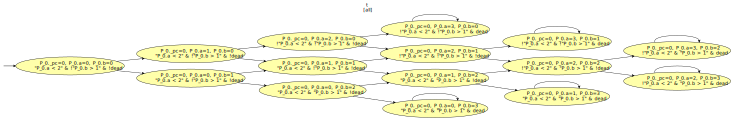

In [4]:
k = model.kripke(['P_0.a < 2', 'P_0.b > 1']); k

And then from this Kripke structure you can do some model checking using the same functions as illustrated in `ltsmin-dve.ipynb`.

For displaying Kripke structures more compactly, it can be useful to use option `1` to move all state labels in tooltips (mouse over the state to see them):

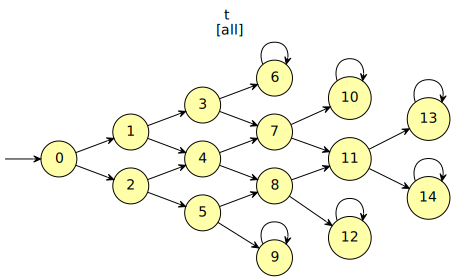

In [5]:
k.show('.1')

Another option is to use option `K` to disable to state-labeling (that is enabled by default for Kripke structure) and use transition-labeling instead.  Combining with `1`, this will preserve the state's data as a tooltip.

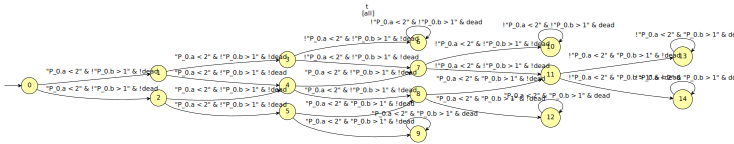

In [6]:
k.show('.1K')

Loading from a `*.pml` file
---------------------------

Another option is to use `ltsmin.load()` to load a Promela file directly.  In order for this test-case to be self-contained, we are going to write the Promela file first, but in practice you probably already have your model.

In [7]:
!rm -rf test1.pml

In [8]:
%%file test1.pml
active proctype P() {
int a = 0;
int b = 0;
x: if
  :: d_step {a < 3 && b < 3; a = a + 1; } goto x;
  :: d_step {a < 3 && b < 3; b = b + 1; } goto x;
fi;
}

Writing test1.pml


Now load it:

In [9]:
model2 = spot.ltsmin.load('test1.pml')

In [10]:
model2

ltsmin model with the following variables:
  P_0._pc: pc
  P_0.a: int
  P_0.b: int

In [11]:
!rm -f test1.pml test1.pml.spins.c test1.pml.spins